# Homework 1 - Algebra lineare numerica

## 2. Risoluzione di sistemi lineari

Creato un problema test di dimensione variabile $n$ la cui soluzione esatta
sia un vettore $x$ generato a piacere e $b$ il termine noto ottenuto moltiplicando la matrice $A$ per la soluzione $x$:
- calcolare il numero di condizione tramite opportuna funzione Python
- risolvere il sistema lineare $Ax = b$ con la fattorizzazione LU o Cholesky.
- Calcolare l’ errore relativo rispetto alla soluzione esatta.

PROBLEMI TEST:
- Una matrice di numeri casuali $A$ generata con la funzione np.random.randn.
- matrice di Hilbert di dimensione n (con n variabile fra 2 e 15) utilizzando la funzione scipy.linalg.hilb.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import hilbert, lu_factor, lu_solve


def matrice_rand(n):
    A = np.random.randn(n, n)  # Matrice casuale nxn
    x_tilde = np.ones((n, 1))  # Soluzione esatta (vettore colonna di 1)
    b = A @ x_tilde  # Calcolo il termine noto b
    
    # Numero di condizionamento
    conds_random = np.linalg.cond(A, 1)
    

    # Risoluzione con fattorizzazione LU
    lu, piv = lu_factor(A)
    x = lu_solve((lu, piv), b)

    # Calcolo errore relativo
    err_rel = np.linalg.norm(x - x_tilde) / np.linalg.norm(x_tilde)
   

    return conds_random, err_rel

def matrice_hilbert(n):
    A = hilbert(n)  # Matrice di Hilbert nxn
    x_tilde = np.ones((n, 1))  # Soluzione esatta (vettore colonna di 1)
    b = A @ x_tilde  # Calcolo il termine noto b

    # Numero di condizionamento
    conds_hilbert = np.linalg.cond(A, 1)
    

    # Risoluzione con fattorizzazione LU
    lu, piv = lu_factor(A)
    x = lu_solve((lu, piv), b)

    # Calcolo errore relativo
    err_rel = np.linalg.norm(x - x_tilde) / np.linalg.norm(x_tilde)
    
    return conds_hilbert, err_rel



- Variare la dimensione n del sistema e fare un grafico dell’errore al variare di $n$
e uno del numero di condizione al variare di $n$.


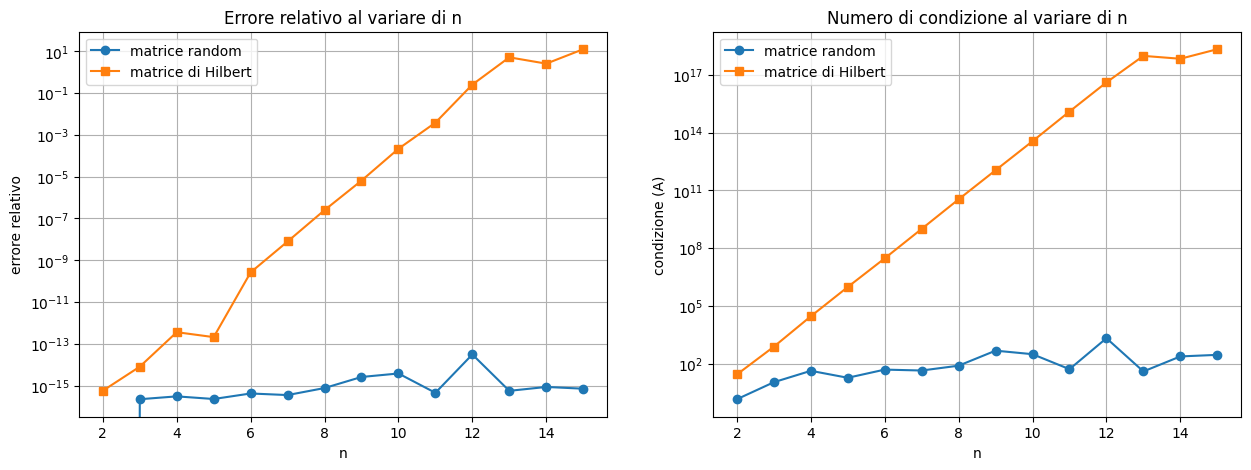

In [17]:
# da 2 a 15
n_val = range(2, 16)

cond_rand_list = []
err_rand_list  = []
cond_hilb_list = []
err_hilb_list  = []


for n in n_val:
    #rand
    condA_rand, err_rand = matrice_rand(n)
    cond_rand_list.append(condA_rand)
    err_rand_list.append(err_rand)

    #Hilbert
    condA_hilb, err_hilb = matrice_hilbert(n)
    cond_hilb_list.append(condA_hilb)
    err_hilb_list.append(err_hilb)


plt.figure(figsize=(15,5))

#plot err rel al variare di n
plt.subplot(1,2,1)
plt.plot(n_val, err_rand_list, 'o-', label='matrice random')
plt.plot(n_val, err_hilb_list, 's-', label='matrice di Hilbert')
plt.title("Errore relativo al variare di n")
plt.xlabel("n")
plt.ylabel("errore relativo")
plt.yscale('log')  
plt.grid(True)
plt.legend()


#plot numero condizione al variare di n
plt.subplot(1,2,2)
plt.plot(n_val, cond_rand_list, 'o-', label='matrice random')
plt.plot(n_val, cond_hilb_list, 's-', label='matrice di Hilbert')
plt.title("Numero di condizione al variare di n")
plt.xlabel("n")
plt.ylabel("condizione (A)")
plt.yscale('log')  
plt.grid(True)
plt.legend()

plt.show()
